In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('../data/DataForTable2.1WHR2023.txt', sep = "\s*,\s*")
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()
df.describe()

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_56923/1944817784.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df= pd.read_csv('../data/DataForTable2.1WHR2023.txt', sep = "\s*,\s*")


,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479227,9.389760,0.810681,63.294582,0.747847,0.000091,0.745208,0.652148,0.271493
std,4.718736,1.125527,1.153402,0.120953,6.901104,0.140137,0.161079,0.185835,0.105913,0.086872
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.258000,-0.338000,0.035000,0.179000,0.083000
25%,2010.000000,4.647000,8.500000,0.747000,59.120000,0.656250,-0.112000,0.688000,0.572000,0.208000
50%,2014.000000,5.432000,9.499000,0.836000,65.050000,0.770000,-0.023000,0.800000,0.663000,0.261000
75%,2018.000000,6.309500,10.373500,0.905000,68.500000,0.859000,0.092000,0.869000,0.738000,0.323000
max,2022.000000,8.019000,11.664000,0.987000,74.475000,0.985000,0.703000,0.983000,0.884000,0.705000


In [3]:
country_names_lst = df.country_name.unique().tolist()
len(country_names_lst)

165

In [4]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

# Life ladder over the Years for all countries

fig,axes = plt.subplots(55,3, figsize =(15,275))
count = 0
for item in country_names_lst:
    g=sns.barplot(data = df[df['country_name'] == item],
                 x = 'year', y = 'life_ladder', 
                 ax=axes[int(count/3)][count%3], color = 'gray')
    #axis = axes.twinx()
    g=sns.pointplot(data = df[df['country_name'] == item],
                 x = 'year', y = 'log_gdp_per_capita', 
                 ax=axes[int(count/3)][count%3], color = 'black')
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    #
    g=sns.pointplot(data = df[df['country_name'] == item],
                 x = 'year', y = df['social_support']*10, 
                 ax=axes[int(count/3)][count%3], color = 'red')

    g=sns.pointplot(data = df[df['country_name'] == item],
                 x = 'year', y = df['healthy_life_expectancy_at_birth']/10, 
                 ax=axes[int(count/3)][count%3], color = 'green')
    
    g=sns.pointplot(data = df[df['country_name'] == item],
                 x = 'year', y = df['freedom_to_make_life_choices']*10, 
                 ax=axes[int(count/3)][count%3], color = 'blue')
    g.set(title = item)
    count += 1


In [ ]:
fig,axes = plt.subplots(55,3, figsize =(15,275))
count = 0
for item in country_names_lst:
    sns.barplot(data = df[df['country_name'] == item],
                 x = 'year', y = 'life_ladder', 
                 ax=axes[int(count/3)][count%3], color='steelblue').set(title=item, xlabel='')
    count += 1


# Correlation Plots

In [ ]:
# Plot pair plot of potential features
sns.pairplot(df[['life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect']]);

In [ ]:
corr_columns=['life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect']
corr_mtrx=df[corr_columns].corr()
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

In [8]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

# freedom_to_make_life_choices over the Years for all countries

In [ ]:
fig,axes = plt.subplots(55,3, figsize =(15,275))
count = 0
for item in country_names_lst:
    g=sns.barplot(data = df[df['country_name'] == item],
                 x = 'year', y = 'freedom_to_make_life_choices', 
                 ax=axes[int(count/3)][count%3], color='steelblue')
    g.set(title=item, xlabel='')
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    count += 1


# healthy_life_expectancy_at_birth over the Years for all countries

In [ ]:
fig,axes = plt.subplots(55,3, figsize =(15,275))
count = 0
for item in country_names_lst:
    sns.barplot(data = df[df['country_name'] == item],
                 x = 'year', y = 'healthy_life_expectancy_at_birth', 
                 ax=axes[int(count/3)][count%3], color='steelblue').set(title=item, xlabel='')
    count += 1


# generosity over the Years for all countries

In [ ]:
# fig,axes = plt.subplots(55,3, figsize =(15,275))
# count = 0
# for item in country_names_lst:
#     sns.barplot(data = df[df['country_name'] == item],
#                  x = 'year', y = 'generosity', 
#                  ax=axes[int(count/3)][count%3], color='steelblue').set(title=item, xlabel='')
#     count += 1


# perceptions_of_corruption over the Years for all countries

In [ ]:
fig,axes = plt.subplots(55,3, figsize =(15,275))
count = 0
for item in country_names_lst:
    sns.barplot(data = df[df['country_name'] == item],
                 x = 'year', y = 'perceptions_of_corruption', 
                 ax=axes[int(count/3)][count%3], color='steelblue').set(title=item, xlabel='')
    count += 1


In [13]:
df['ladder_bin'] = df.life_ladder.astype(int)

In [14]:
df.ladder_bin.value_counts()

ladder_bin
5    673
4    584
6    487
7    250
3    182
2     21
1      1
8      1
Name: count, dtype: int64

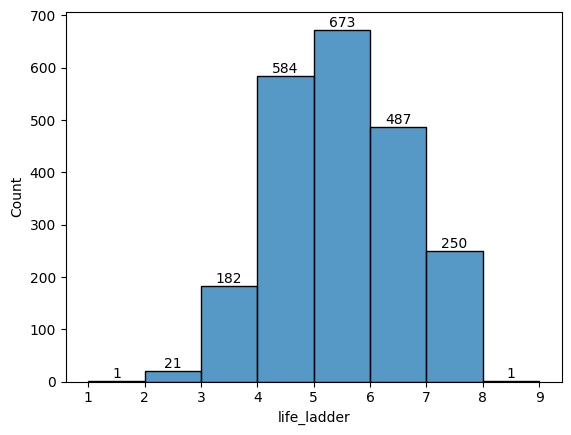

In [15]:
custom_bins = np.arange(1,10,1)
h = sns.histplot(df.life_ladder, bins = custom_bins)
for c in h.containers:
        h.bar_label(c, label_type='edge')

In [16]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect',
       'ladder_bin'],
      dtype='object')

In [17]:
dict_ladder_bin = []
for m in range(2,9):
    dict_ladder_bin.append({'ladder_bin': m,
                            'life_ladder': df.query(f'ladder_bin == {m}').life_ladder.mean(),
                            'log_gdp_per_capita': df.query(f'ladder_bin == {m}').log_gdp_per_capita.mean(),
                            'social_support': df.query(f'ladder_bin == {m}').social_support.mean(),
                            'healthy_life_expectancy_at_birth': df.query(f'ladder_bin == {m}').healthy_life_expectancy_at_birth.mean(),
                            'freedom_to_make_life_choices': df.query(f'ladder_bin == {m}').freedom_to_make_life_choices.mean(),
                            'generosity': df.query(f'ladder_bin == {m}').generosity.mean(),
                            'perceptions_of_corruption': df.query(f'ladder_bin == {m}').perceptions_of_corruption.mean(),
                            'positive_affect': df.query(f'ladder_bin == {m}').positive_affect.mean(),
                            'negative_affect': df.query(f'ladder_bin == {m}').negative_affect.mean(),
                            })
    
df_ladder_bin = pd.DataFrame(dict_ladder_bin)
df_ladder_bin

,ladder_bin,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,2,2.702143,7.788316,0.515524,55.190952,0.524667,-0.037053,0.854667,0.462000,0.432429
1,3,3.650890,7.931575,0.662538,53.907280,0.666956,-0.000155,0.768508,0.600508,0.288626
2,4,4.548389,8.506330,0.736787,58.576446,0.683095,-0.009253,0.802254,0.606406,0.300109
3,5,5.483722,9.457340,0.824016,64.338850,0.731774,-0.038907,0.807633,0.635450,0.274144
4,6,6.439764,10.256849,0.888351,67.952009,0.812669,-0.001119,0.723910,0.708565,0.248909
5,7,7.341380,10.748332,0.933185,70.138100,0.894120,0.135374,0.466205,0.748392,0.215056
6,8,8.019000,10.849000,0.972000,68.300000,0.971000,NaN,0.237000,0.777000,0.154000


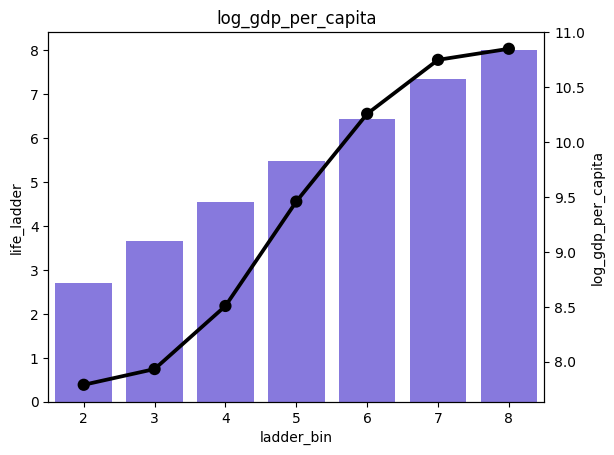

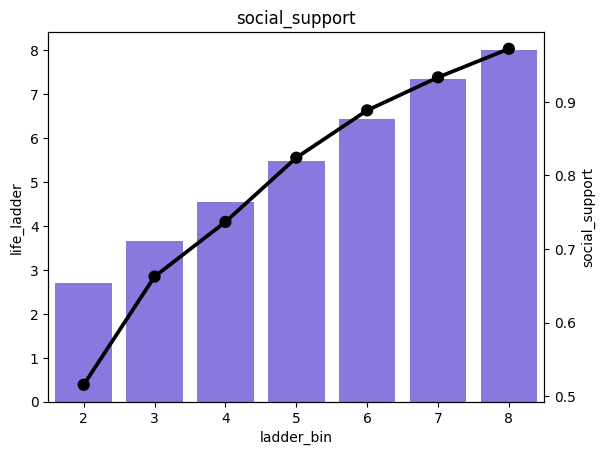

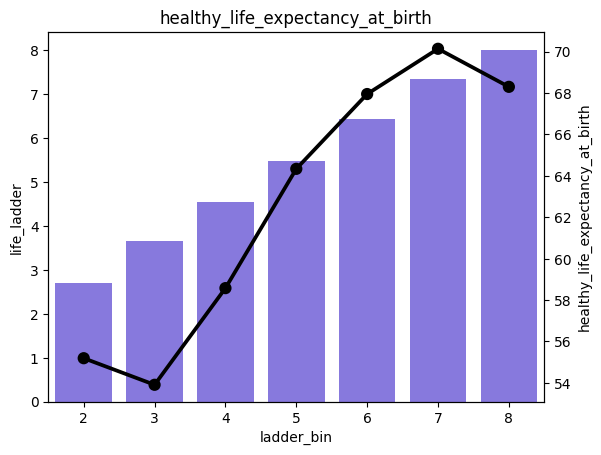

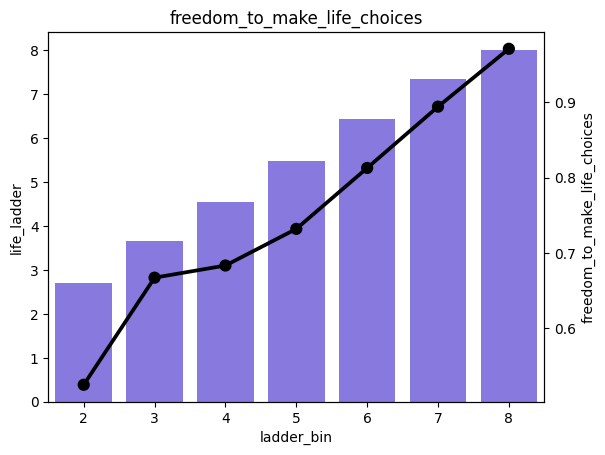

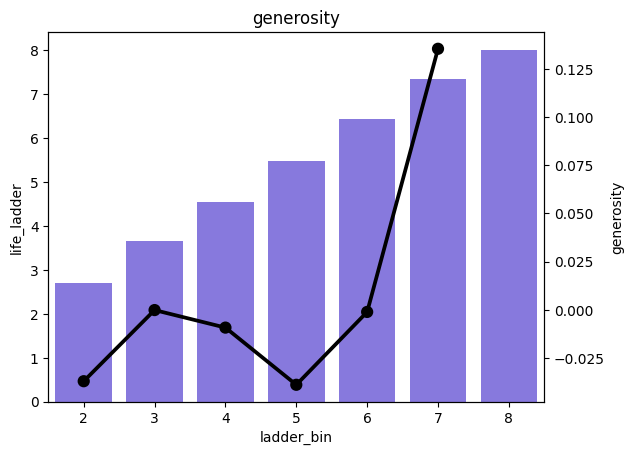

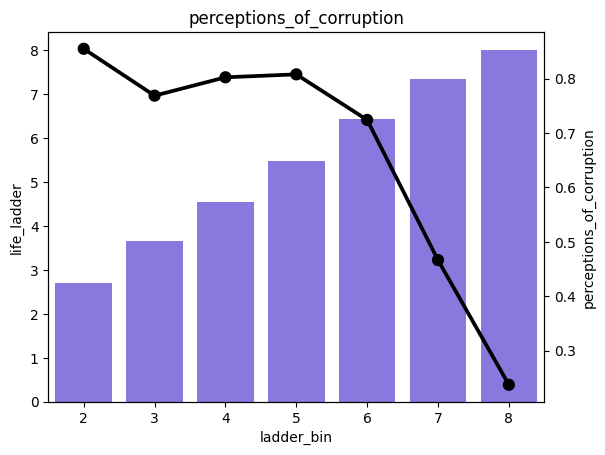

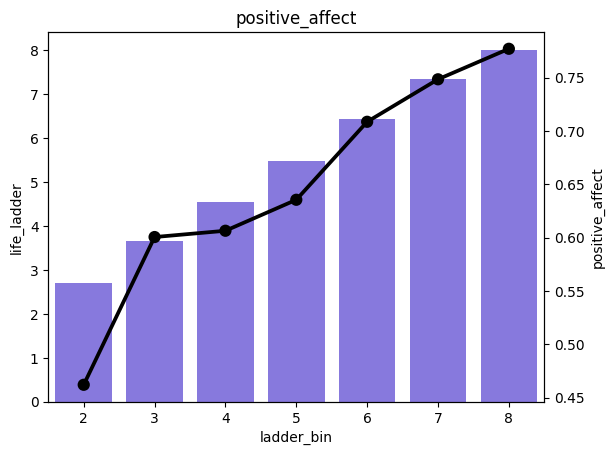

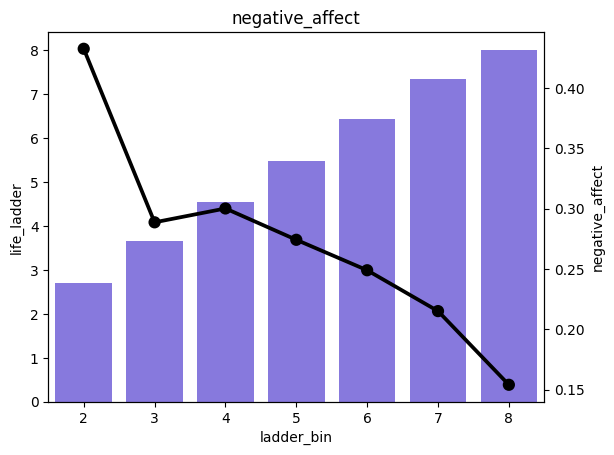

In [18]:
selected_columns = ['log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect']
for i in selected_columns:
    plt.figure()
    ax1 = sns.barplot(x = df_ladder_bin.ladder_bin,
                y = df_ladder_bin.life_ladder,
                color = 'mediumslateblue',
                order= df_ladder_bin.ladder_bin.sort_values(ascending= True))
    ax2 = ax1.twinx()
    sns.pointplot(x = df_ladder_bin.ladder_bin,
                y = df_ladder_bin[i],
                color = 'black')
    ax1.set(title = i)
    plt.show();